In [1]:
import numpy as np
import random
from numpy import linalg as LA
import matplotlib.pyplot as plt
import pandas as pd
# %matplotlib qt

### The backpropagation algorithm is implemented as follows:

In [2]:
def forward_pass(X, W_hi, W_jh, b_h, b_o, num_in_node, num_hid_node, num_op_node):
      
    # hidden layer
    Zh = np.dot(X, W_hi) + b_h  # hidden layer activation potential
    S_Zh = sigmod_fun(Zh)       # hidden layer output
    
    # Output layer
    Yj = np.dot(S_Zh, W_jh) + b_o  # output layer activation potential
    S_Yj = sigmod_fun(Yj)          # output layer output
    
    return Zh, Yj, S_Zh, S_Yj

def back_propagation(X, d, W_hi, W_jh, Zh, S_Zh, Yj, S_Yj, b_h, b_o, eta, num_in_node, num_hid_node, num_op_node):
    e = (S_Yj - d)
    
    Sd_Yj = sigmod_deriv_fun(Yj)
    Sd_Zh = sigmod_deriv_fun(Zh)
    
    # output bias update
    b_o = b_o - eta*e*np.reshape(Sd_Yj,(1,num_op_node))
    
    # hidden bias update
    a = np.dot(W_jh, e*Sd_Yj)
    b_h = b_h - eta*np.reshape(a, (1, num_hid_node))*Sd_Zh 
    
    # weight update input to hidden
    gam = np.sum(e*Sd_Yj*np.reshape(W_jh, (num_hid_node,1,num_op_node)), axis=2)    
    a = np.ones((num_in_node, num_hid_node))*np.reshape(gam, (1,num_hid_node))
    b = np.ones((num_in_node, num_hid_node))*np.reshape(Sd_Zh, (1,num_hid_node))
    c = np.ones((num_in_node, num_hid_node))*np.reshape(X, (1,num_in_node))
    W_hi = W_hi - eta*np.reshape(a*b*c, (num_in_node,num_hid_node))
    
    # weight update hidden to output
    a = np.ones((num_op_node, num_hid_node))*np.reshape(e, (1, num_op_node))
    b = np.ones((num_op_node, num_hid_node))*np.reshape(Sd_Yj, (1, num_op_node))
    c = np.ones((num_op_node, num_hid_node))*np.reshape(S_Zh, (1, num_hid_node))
    W_jh = W_jh - eta*np.reshape(a*b*c, (num_hid_node,num_op_node))

    
   
    

  
    return W_jh, W_hi, b_o, b_h

def sigmod_fun(X):
    return 1/(1+np.exp(-X))

def sigmod_deriv_fun(X):
    X_sig = sigmod_fun(X)
    Z = X_sig*(1-X_sig)
    return Z


In [3]:
# ##------------- AND -------------------
X = np.array([[0,0],[0,1],[1,0],[1,1]])
d = np.array([[0],[0],[0],[1]])

# ##------------- XOR -------------------
# X = np.array([[0,0],[0,1],[1,0],[1,1]])
# d = np.array([[0],[1],[1],[0]])

epochs = 10000
eta = 0.1
num_in_node, num_hid_node, num_op_node = 2,2,1

# initialize weights and biases
W_hi = np.random.uniform(size = (num_in_node,num_hid_node))
W_jh = np.random.uniform(size = (num_hid_node,num_op_node))
b_h = np.random.uniform(size = (1,num_hid_node))
b_o = np.random.uniform(size = (1,num_op_node))


# W_hi = np.array([ [0.1, 0.2], [2.1, 1.1] ])
# W_jh = np.array([ [0.6], [1.1] ])
# b_h =  np.array([ [0.5, 0.5] ])
# b_o =  np.array([ [0.5] ])

error_epoch = np.zeros((epochs,1))

# Zh, Yj, S_Zh, S_Yj = forward_pass(X[0,:], W_hi, W_jh, b_h, b_o, num_in_node, num_hid_node, num_op_node)

# # print(Zh)
# # print(Yj)
# # print(S_Zh)
# # print(S_Yj)

# W_jh, W_hi, b_o, b_h = back_propagation(X[0,:], d[0], W_hi, W_jh, Zh, S_Zh, Yj, S_Yj, b_h, b_o, eta, num_in_node, num_hid_node, num_op_node)
# # print('--------------')
# # print(W_jh)
# print(W_hi)
# print(b_o)
# print(b_h)


for i in range(epochs):
    error = 0
    for j in range(4):
        Zh, Yj, S_Zh, S_Yj = forward_pass(X[j,:], W_hi, W_jh, b_h, b_o, num_in_node, num_hid_node, num_op_node)
        W_jh, W_hi, b_o, b_h = back_propagation(X[j,:], d[j], W_hi, W_jh, Zh, S_Zh, Yj, S_Yj, b_h, b_o, eta, num_in_node, num_hid_node, num_op_node)
        error += 0.5*(S_Yj - d[j])
    error_epoch[i] = error
        
    
        


[[0.00948201]
 [0.03956505]
 [0.02549806]
 [0.95850151]]


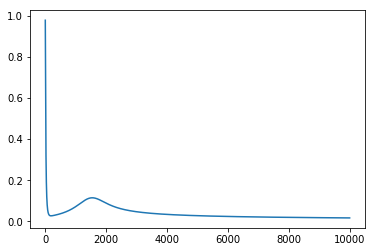

In [4]:
plt.plot(error_epoch)
Zh, Yj, S_Zh, S_Yj = forward_pass(X, W_hi, W_jh, b_h, b_o, num_in_node, num_hid_node, num_op_node)
print(S_Yj)

In [5]:
print(W_hi-0.1*np.array([[0.00278902],[0.00278902]]))

[[4.13059262 0.87582668]
 [4.72453137 0.82358388]]
